# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("example.env")
api_key = os.getenv("News_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')
btc_articles

{'status': 'ok',
 'totalResults': 3784,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Mariella Moon',
   'title': 'FBI and CISA warn against surge in voice phishing campaigns',
   'description': 'Authorities saw an uptick in voice phishing (or “vishing”) campaigns after the pandemic forced companies to implement work-from-home arrangements. That’s what the Federal Bureau of Investigation (FBI) and the Cybersecurity and Infrastructure Security Agency (…',
   'url': 'https://www.engadget.com/fbi-cisa-issue-voice-phishing-campaign-advisory-121936127.html',
   'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-images%2F2019-08%2F963d0510-bf49-11e9-beff-3f5e5758e121&client=amp-blogside-v2&signature=79d749ba8d928e91cc070a6e5de85e6011dad5c2',
   'publishedAt': '2020-08-23T12:19:36Z',
   'content': '“The COVID-19 pandemic has resulted in a mass shift to working fr

In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')
ethereum_articles

{'status': 'ok',
 'totalResults': 1333,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Stan Schroeder',
   'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
   'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
   'url': 'https://mashable.com/article/metamask-ios-android/',
   'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
   'publishedAt': '2020-09-02T16:00:00Z',
   'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension t

In [6]:
# Create a function - Create the sentiment scores DataFrame
def get_sentiment_scores(article_type, key_word):
    sentiments = []
    for article in article_type["articles"]:
        try:
            text = article[key_word]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({"text": text,
                               "date": date,
                               "compound": compound,
                               "positive": pos,
                               "negative": neg,
                               "neutral": neu
                               })
        except AttributeError:
            pass
    
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_scores(btc_articles, 'content')
btc_sentiment_df

,text,date,compound,positive,negative,neutral
0,“The COVID-19 pandemic has resulted in a mass ...,2020-08-23,0.2732,0.063,0.000,0.937
1,In what appears to be a massive coordinated st...,2020-08-07,-0.1280,0.000,0.046,0.954
2,LONDON (Reuters) - Bitcoin jumped to its highe...,2020-08-17,0.3818,0.069,0.000,0.931
3,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-26,0.5070,0.090,0.000,0.910
4,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-20,0.5070,0.090,0.000,0.910
5,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-17,0.5070,0.090,0.000,0.910
6,Our robot colleague Satoshi Nakaboto writes ab...,2020-09-07,0.5070,0.090,0.000,0.910
7,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-21,0.5070,0.090,0.000,0.910
8,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-25,0.5070,0.090,0.000,0.910
9,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-28,0.5070,0.090,0.000,0.910


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment_df = get_sentiment_scores(ethereum_articles, 'content')
ethereum_sentiment_df

,text,date,compound,positive,negative,neutral
0,If you've interacted with cryptocurrencies in ...,2020-09-02,0.7506,0.209,0.000,0.791
1,TL;DR: The Complete Stock and Cryptocurrency I...,2020-09-07,0.0000,0.000,0.000,1.000
2,TL;DR: The Mega Blockchain Mastery Bundle is o...,2020-08-17,0.0000,0.000,0.000,1.000
3,LONDON (Reuters) - It sounds like a surefire b...,2020-08-26,0.7579,0.181,0.000,0.819
4,NEW YORK (Reuters) - Brooklyn-based technology...,2020-08-25,0.0000,0.000,0.000,1.000
5,An outspoken Bitcoin whale who rarely shows af...,2020-08-19,-0.2677,0.045,0.074,0.881
6,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,2020-08-14,0.3400,0.072,0.000,0.928
7,Our robot colleague Satoshi Nakaboto writes ab...,2020-09-03,0.5070,0.090,0.000,0.910
8,Ethereum is one of the most growing cryptocurr...,2020-08-11,0.2484,0.057,0.000,0.943
9,"Ethereum, having long played second fiddle to ...",2020-09-01,0.4019,0.110,0.000,0.890


In [9]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.474750,0.090950,0.002300,0.906750
std,0.165944,0.035032,0.010286,0.029877
min,-0.128000,0.000000,0.000000,0.802000
25%,0.507000,0.090000,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.910000
max,0.750600,0.198000,0.046000,0.954000


In [10]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,compound,positive,negative,neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.167859,0.067941,0.023647,0.908412
std,0.384435,0.074629,0.056465,0.097294
min,-0.599400,0.000000,0.000000,0.732000
25%,0.000000,0.000000,0.000000,0.819000
50%,0.000000,0.057000,0.000000,0.928000
75%,0.401900,0.110000,0.000000,1.000000
max,0.817600,0.209000,0.189000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin - 0.090950

Q: Which coin had the highest compound score?

A: Ethereum - 0.8176

Q. Which coin had the highest positive score?

A: Ethereum - 0.209

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english'))

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Convert the words to lowercase
    words = word_tokenize(re_clean.lower())
    
    # Remove the stop words
    words = [word for word in words if word not in sw]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [14]:
btc_sentiment_df["text"]

0     “The COVID-19 pandemic has resulted in a mass ...
1     In what appears to be a massive coordinated st...
2     LONDON (Reuters) - Bitcoin jumped to its highe...
3     Our robot colleague Satoshi Nakaboto writes ab...
4     Our robot colleague Satoshi Nakaboto writes ab...
5     Our robot colleague Satoshi Nakaboto writes ab...
6     Our robot colleague Satoshi Nakaboto writes ab...
7     Our robot colleague Satoshi Nakaboto writes ab...
8     Our robot colleague Satoshi Nakaboto writes ab...
9     Our robot colleague Satoshi Nakaboto writes ab...
10    Our robot colleague Satoshi Nakaboto writes ab...
11    Our robot colleague Satoshi Nakaboto writes ab...
12    Our robot colleague Satoshi Nakaboto writes ab...
13    Our robot colleague Satoshi Nakaboto writes ab...
14    FTX, a cryptocurrency exchange that offers der...
15    Our robot colleague Satoshi Nakaboto writes ab...
16    Our robot colleague Satoshi Nakaboto writes ab...
17    Our robot colleague Satoshi Nakaboto write

In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['text'].apply(tokenizer)
btc_sentiment_df

,text,date,compound,positive,negative,neutral,tokens
0,“The COVID-19 pandemic has resulted in a mass ...,2020-08-23,0.2732,0.063,0.000,0.937,"[covid, pandemic, resulted, mass, shift, worki..."
1,In what appears to be a massive coordinated st...,2020-08-07,-0.1280,0.000,0.046,0.954,"[appears, massive, coordinated, strike, reddit..."
2,LONDON (Reuters) - Bitcoin jumped to its highe...,2020-08-17,0.3818,0.069,0.000,0.931,"[london, reuters, bitcoin, jumped, highest, ye..."
3,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-26,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-20,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
5,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-17,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
6,Our robot colleague Satoshi Nakaboto writes ab...,2020-09-07,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
7,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-21,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
8,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-25,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
9,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-28,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [17]:
# Create a new tokens column for Ethereum
ethereum_sentiment_df['tokens'] = ethereum_sentiment_df['text'].apply(tokenizer)
ethereum_sentiment_df

,text,date,compound,positive,negative,neutral,tokens
0,If you've interacted with cryptocurrencies in ...,2020-09-02,0.7506,0.209,0.000,0.791,"[youve, interacted, cryptocurrencies, past, co..."
1,TL;DR: The Complete Stock and Cryptocurrency I...,2020-09-07,0.0000,0.000,0.000,1.000,"[tldr, complete, stock, cryptocurrency, invest..."
2,TL;DR: The Mega Blockchain Mastery Bundle is o...,2020-08-17,0.0000,0.000,0.000,1.000,"[tldr, mega, blockchain, mastery, bundle, sale..."
3,LONDON (Reuters) - It sounds like a surefire b...,2020-08-26,0.7579,0.181,0.000,0.819,"[london, reuters, sound, like, surefire, bet, ..."
4,NEW YORK (Reuters) - Brooklyn-based technology...,2020-08-25,0.0000,0.000,0.000,1.000,"[new, york, reuters, brooklynbased, technology..."
5,An outspoken Bitcoin whale who rarely shows af...,2020-08-19,-0.2677,0.045,0.074,0.881,"[outspoken, bitcoin, whale, rarely, show, affe..."
6,REUTERS/Rick Wilking\r\n<ul><li>Michael Novogr...,2020-08-14,0.3400,0.072,0.000,0.928,"[reutersrick, wilkingullimichael, novogratz, t..."
7,Our robot colleague Satoshi Nakaboto writes ab...,2020-09-03,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
8,Ethereum is one of the most growing cryptocurr...,2020-08-11,0.2484,0.057,0.000,0.943,"[ethereum, one, growing, cryptocurrencies, rec..."
9,"Ethereum, having long played second fiddle to ...",2020-09-01,0.4019,0.110,0.000,0.890,"[ethereum, long, played, second, fiddle, numbe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [42]:
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(btc_sentiment_df)
ethereum_tokens = get_token(ethereum_sentiment_df)

In [20]:
def bigram_counter(tokens, N): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=N)
    return dict(Counter(bigrams).most_common(10))

In [21]:
# Generate the Bitcoin N-grams where N=2
bit_ngram = bigram_counter(btc_tokens, 2)

In [22]:
# Generate the Ethereum N-grams where N=2
eth_ngram = bigram_counter(ethereum_tokens, 2)

In [23]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('bitcoin', 47),
 ('satoshi', 30),
 ('nakaboto', 30),
 ('char', 20),
 ('tell', 16),
 ('robot', 15),
 ('colleague', 15),
 ('writes', 15),
 ('every', 15),
 ('fucking', 15)]

In [25]:
# Get the top 10 words for Ethereum
token_count(ethereum_tokens, 10)

[('char', 17),
 ('bitcoin', 9),
 ('ethereum', 8),
 ('cryptocurrency', 5),
 ('price', 5),
 ('btc', 4),
 ('youve', 3),
 ('could', 3),
 ('startup', 3),
 ('one', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

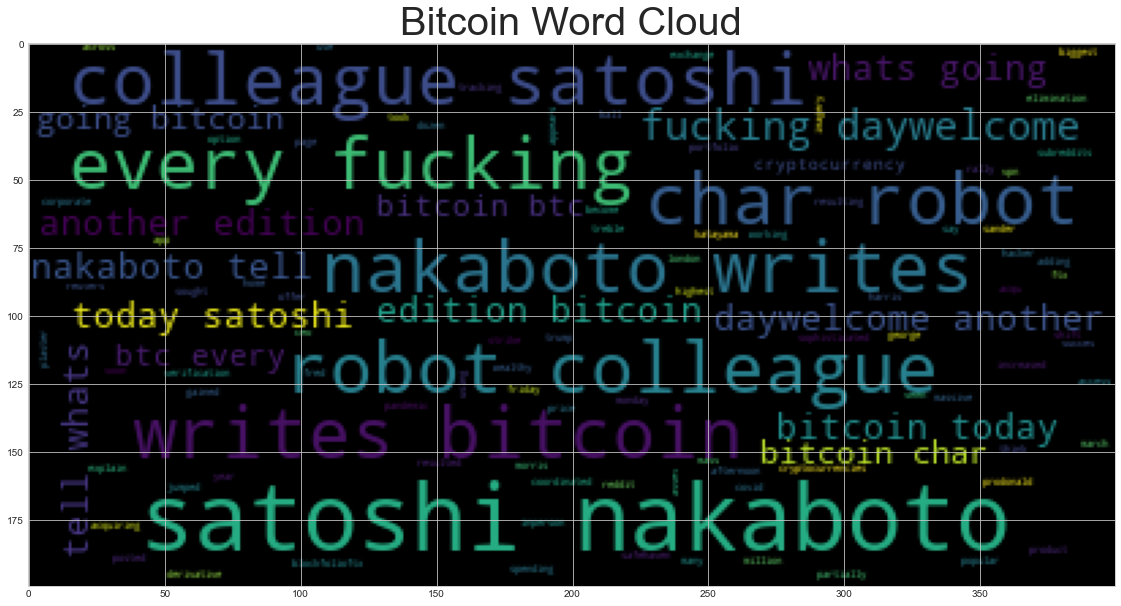

In [46]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 40)
plt.imshow(wc)

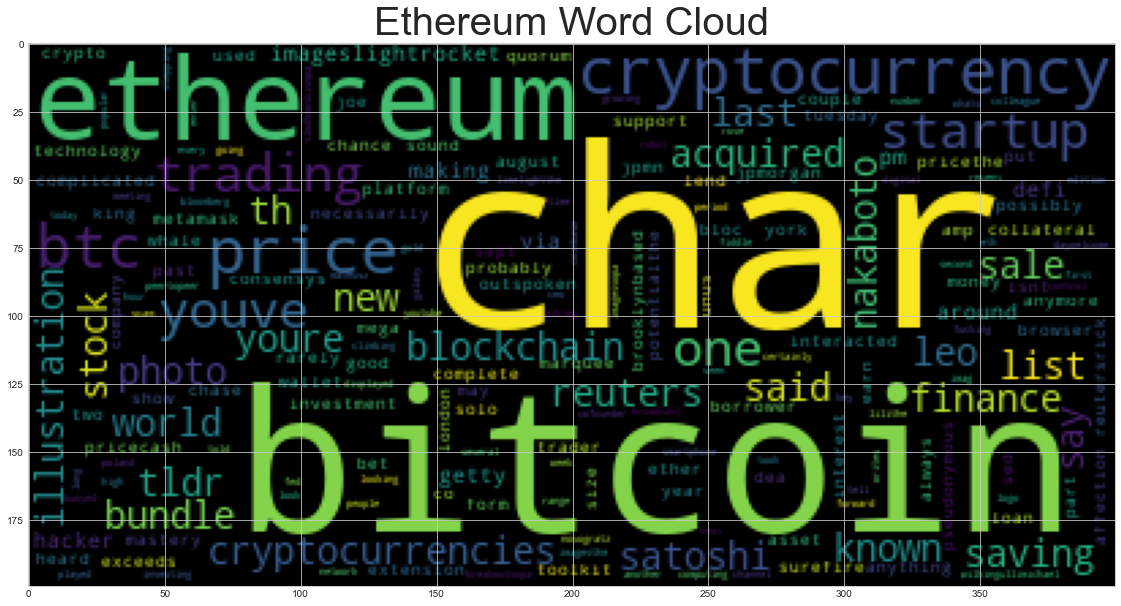

In [45]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(ethereum_tokens))
plt.title("Ethereum Word Cloud", fontsize = 40)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['text'])
btc_content

'“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars] In what appears to be a massive coordinated strike against Reddit, hackers took over dozens of pages on Friday afternoon, using their access to plaster pro-Donald Trump imagery across subreddits with… [+3494 chars] LONDON (Reuters) - Bitcoin jumped to its highest in over a year on Monday, adding to a 2020 rally that has seen it more than treble in price since March. \r\nThe biggest cryptocurrency gained 4.4% to $… [+389 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in the … [+2802 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I

In [33]:
# Run the NER processor on all of the text
doc = nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

In [34]:
# Render the visualization
displacy.render(doc, style='ent')

In [35]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

VPN PRODUCT
Reddit ORG
over dozens CARDINAL
Friday DATE
afternoon TIME
pro-Donald Trump PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakabot

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(ethereum_sentiment_df['text'])
eth_content

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars] TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars] TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars] LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars] NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain plat

In [37]:
# Run the NER processor on all of the text
doc = nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [38]:
# Render the visualization
displacy.render(doc, style='ent')

In [39]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
29.81 MONEY
August 17 DATE
97% PERCENT
LONDON GPE
Reuters ORG
about 20% PERCENT
NEW YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Rick Wilking PERSON
ul><li PERSON
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
The Galaxy Digital ORG
Fed ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
first ORDINAL
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
Last week DATE
YouTube PRODUCT
Bitcoin GPE
Bitcoin GPE
one-week DATE
ul><li PERSON
Bitcoin GPE
BTC ORG
around $11,595 MONEY
20:0 CARDINAL
Monday DATE
500 CARDINAL
less than 1% PERCENT
3 p.m. EDT TIME
Ho PER

---